In [93]:
%config Completer.use_jedi = False

In [2]:
import matplotlib.pyplot as plt # Import the Matplotlib package
from osgeo import gdal # Import the GDAL library
import numpy as np
import seaborn as sns
#from mpl_toolkits.basemap import Basemap

In [66]:
# Read the GRIB file
#grib = gdal.Open('/opt/wrfdatos/GFS025/2020_01/14_06/GFS_2020011406+009.grib2')
grib = gdal.Open('/opt/datos/gfs/2017-2019_f009-f024/gfs.0p25.2017112306.f015.grib2')

In [102]:
for i in range(1,10):
    band = grib.GetRasterBand(i)
    metadata = band.GetMetadata()
    band_name = metadata['GRIB_COMMENT']
    band_description = band.GetDescription()
#    if("Geopotential height [gpm]" in band_name):
    print(i,band_name)
    print(band_description)
    print(metadata)

1 03 hr Total precipitation [kg/(m^2)]
0[-] SFC="Ground or water surface"
{'GRIB_COMMENT': '03 hr Total precipitation [kg/(m^2)]', 'GRIB_DISCIPLINE': '0(Meteorological)', 'GRIB_ELEMENT': 'APCP03', 'GRIB_FORECAST_SECONDS': '43200 sec', 'GRIB_IDS': 'CENTER=60(US-NCAR) SUBCENTER=1 MASTER_TABLE=2 LOCAL_TABLE=1 SIGNF_REF_TIME=1(Start_of_Forecast) REF_TIME=2017-11-23T06:00:00Z PROD_STATUS=0(Operational) TYPE=1(Forecast)', 'GRIB_PDS_PDTN': '8', 'GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES': '1 8 2 0 96 0 0 1 12 1 0 0 255 -127 -2147483647 2017 11 23 21 0 0 1 0 1 2 1 3 255 0', 'GRIB_PDS_TEMPLATE_NUMBERS': '1 8 2 0 96 0 0 0 1 0 0 0 12 1 0 0 0 0 0 255 255 255 255 255 255 7 225 11 23 21 0 0 1 0 0 0 0 1 2 1 0 0 0 3 255 0 0 0 0', 'GRIB_REF_TIME': '  1511416800 sec UTC', 'GRIB_SHORT_NAME': '0-SFC', 'GRIB_UNIT': '[kg/(m^2)]', 'GRIB_VALID_TIME': '  1511470800 sec UTC'}
2 Convective precipitation [kg/(m^2)]
0[-] SFC="Ground or water surface"
{'GRIB_COMMENT': 'Convective precipitation [kg/(m^2)]', 'GRIB_DISCIPLIN

AttributeError: 'NoneType' object has no attribute 'GetMetadata'

In [85]:
# Read an specific band
# band 99 = 500 hPa  -  band 119 = 700 hPa  -  band 163 =  1000hPa
band1 = grib.GetRasterBand(1)
band2 = grib.GetRasterBand(2)

In [86]:
# Read the band as a Python array
data1 = band1.ReadAsArray()
data2 = band2.ReadAsArray()

In [74]:
data.shape

(137, 157)

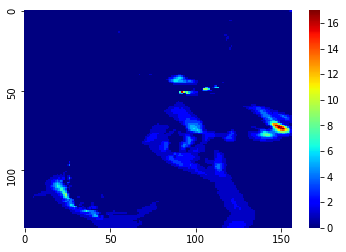

In [127]:
ax = sns.heatmap(data1, cmap='jet', xticklabels=50, yticklabels=50)
#plt.show()

# Prec Total vs. Prec Convectiva

Text(0.5, 1.0, 'Precipitacion Convectiva')

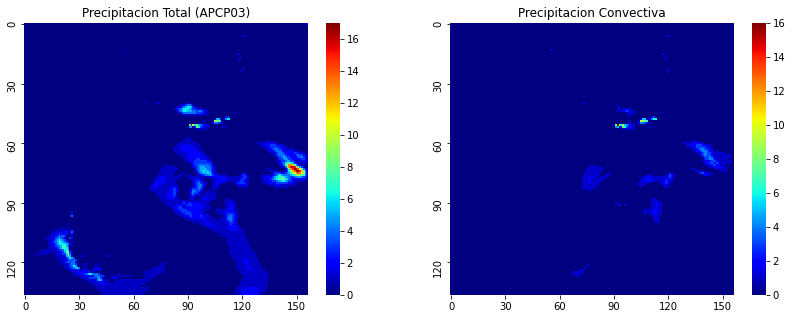

In [126]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))

g1 = sns.heatmap(data1,cmap="jet",cbar=True, ax=ax1, xticklabels=30, yticklabels=30)
g1.set_title('Precipitacion Total (APCP03)')
g2 = sns.heatmap(data2,cmap="jet",cbar=True, ax=ax2, xticklabels=30, yticklabels=30)
g2.set_title('Precipitacion Convectiva')

In [71]:
# Show the image
#plt.imshow(data, cmap='jet')

In [67]:
band = grib.GetRasterBand(163)
metadata = band.GetMetadata()
band_name = metadata['GRIB_COMMENT']
band_description = band.GetDescription()
print(band_name)
print(band_description)
print(metadata)

Geopotential height [gpm]
100000[Pa] ISBL="Isobaric surface"
{'GRIB_COMMENT': 'Geopotential height [gpm]', 'GRIB_DISCIPLINE': '0(Meteorological)', 'GRIB_ELEMENT': 'HGT', 'GRIB_FORECAST_SECONDS': '32400 sec', 'GRIB_IDS': 'CENTER=7(US-NCEP) SUBCENTER=0 MASTER_TABLE=2 LOCAL_TABLE=1 SIGNF_REF_TIME=1(Start_of_Forecast) REF_TIME=2020-01-14T06:00:00Z PROD_STATUS=0(Operational) TYPE=1(Forecast)', 'GRIB_PDS_PDTN': '0', 'GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES': '3 5 2 0 96 0 0 1 9 100 0 100000 255 0 0', 'GRIB_PDS_TEMPLATE_NUMBERS': '3 5 2 0 96 0 0 0 1 0 0 0 9 100 0 0 1 134 160 255 0 0 0 0 0', 'GRIB_REF_TIME': '  1578981600 sec UTC', 'GRIB_SHORT_NAME': '100000-ISBL', 'GRIB_UNIT': '[gpm]', 'GRIB_VALID_TIME': '  1579014000 sec UTC'}


In [14]:
# Choose the visualization extent (min lon, min lat, max lon, max lat)
#extent = [-96.0, -75.0, -15.0, -10.0]
extent = [-65.0, -35.0, -61.0, -30.0]
min_lon = extent[0]; max_lon = extent[2]; min_lat = extent[1]; max_lat = extent[3]

In [153]:
#Esta celda utilizarla cuando tengamos un mapa definido
#==============================================================================
# Plotting the data
#==============================================================================
# Create the basemap reference for the Rectangular Projection
bmap = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326)
 
# Draw the country
bmap.readshapefile('/home/joaquin/Imagenes/mapa','BRA_adm1',linewidth=0.50,color='white')
bmap.readshapefile('/home/joaquin/Imagenes/mapa','ne_10m_admin_0_countries',linewidth=0.50,color='white')
 
# Draw parallels and meridians
bmap.drawparallels(np.arange(-90.0, 90.0, 5.0), linewidth=0.3, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=7)
bmap.drawmeridians(np.arange(0.0, 360.0, 5.0), linewidth=0.3, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=7)
 
# Plot the model information
bmap.imshow(data, origin='upper', cmap='jet')


OSError: cannot locate /home/joaquin/Imagenes/mapa.shp

<a list of 72 text.Text objects>

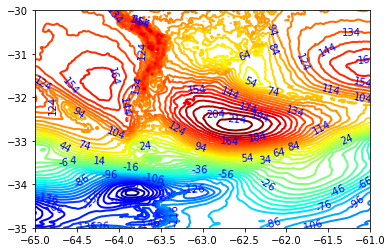

In [15]:
# Evenly spacing latitudes and longitudes over a specified interval (n° of lines and columns)
x = np.linspace(min_lon, max_lon, data.shape[1])
y = np.linspace(max_lat, min_lat, data.shape[0])
 
# Create the rectangular grid
xx, yy = np.meshgrid(x, y)
 
# Define de contour interval
data_min = np.min(data)
data_max = np.max(data)
interval = 10
levels = np.arange(data_min,data_max,interval)
 
# Plot the contour
S1 = plt.contour(xx, yy, data, alpha = 1, linewidths = 2.0, cmap='jet', levels=levels)
 
# Plot the contour labels
plt.clabel(S1,inline= 0,inline_spacing= 0,fontsize= 10,fmt= '%1.0f',colors= 'blue')


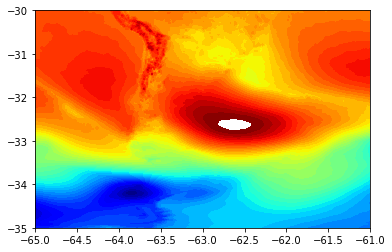

In [16]:
# Plot the filled contour
S1 = plt.contourf(xx, yy, data, alpha = 1.0, cmap='jet', levels=levels)